# **Airlines+data**

In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Import dataset
airline = pd.read_csv('/content/Airlines+Data.csv')
airline.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [3]:
airline.isna().sum()

Month         0
Passengers    0
dtype: int64

In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [5]:
airline['Month'].unique()

array(['Jan-95', 'Feb-95', 'Mar-95', 'Apr-95', 'May-95', 'Jun-95',
       'Jul-95', 'Aug-95', 'Sep-95', 'Oct-95', 'Nov-95', 'Dec-95',
       'Jan-96', 'Feb-96', 'Mar-96', 'Apr-96', 'May-96', 'Jun-96',
       'Jul-96', 'Aug-96', 'Sep-96', 'Oct-96', 'Nov-96', 'Dec-96',
       'Jan-97', 'Feb-97', 'Mar-97', 'Apr-97', 'May-97', 'Jun-97',
       'Jul-97', 'Aug-97', 'Sep-97', 'Oct-97', 'Nov-97', 'Dec-97',
       'Jan-98', 'Feb-98', 'Mar-98', 'Apr-98', 'May-98', 'Jun-98',
       'Jul-98', 'Aug-98', 'Sep-98', 'Oct-98', 'Nov-98', 'Dec-98',
       'Jan-99', 'Feb-99', 'Mar-99', 'Apr-99', 'May-99', 'Jun-99',
       'Jul-99', 'Aug-99', 'Sep-99', 'Oct-99', 'Nov-99', 'Dec-99',
       'Jan-00', 'Feb-00', 'Mar-00', 'Apr-00', 'May-00', 'Jun-00',
       'Jul-00', 'Aug-00', 'Sep-00', 'Oct-00', 'Nov-00', 'Dec-00',
       'Jan-01', 'Feb-01', 'Mar-01', 'Apr-01', 'May-01', 'Jun-01',
       'Jul-01', 'Aug-01', 'Sep-01', 'Oct-01', 'Nov-01', 'Dec-01',
       'Jan-02', 'Feb-02', 'Mar-02', 'Apr-02', 'May-02', 'Jun-

In [6]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


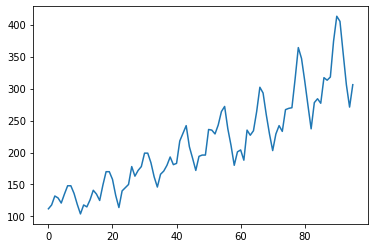

In [7]:
airline.Passengers.plot()

In [8]:
airline['Date']= pd.to_datetime(airline.Month,format='%b-%y')
airline['Months']= airline.Date.dt.strftime('%b')
airline['Year'] = airline.Date.dt.strftime('%Y')
airline

,Month,Passengers,Date,Months,Year
0,Jan-95,112,1995-01-01,Jan,1995
1,Feb-95,118,1995-02-01,Feb,1995
2,Mar-95,132,1995-03-01,Mar,1995
3,Apr-95,129,1995-04-01,Apr,1995
4,May-95,121,1995-05-01,May,1995
...,...,...,...,...,...
91,Aug-02,405,2002-08-01,Aug,2002
92,Sep-02,355,2002-09-01,Sep,2002
93,Oct-02,306,2002-10-01,Oct,2002
94,Nov-02,271,2002-11-01,Nov,2002


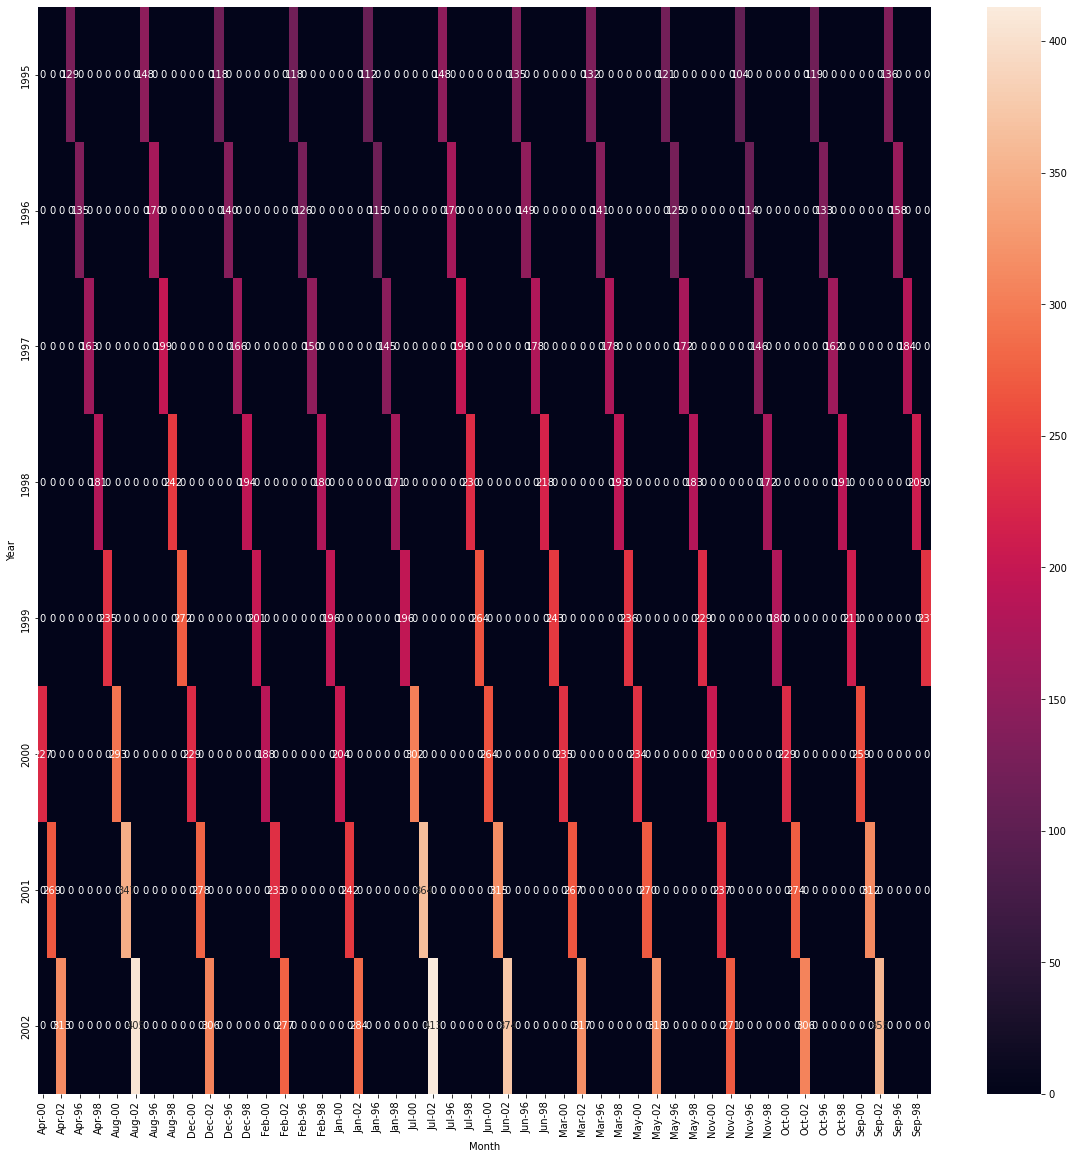

In [9]:
# Heatmap
plt.figure(figsize=(20,20))
heatmap_y_month = pd.pivot_table(data=airline,values='Passengers',index='Year',columns='Month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt='g') # fmt is format of the grid values

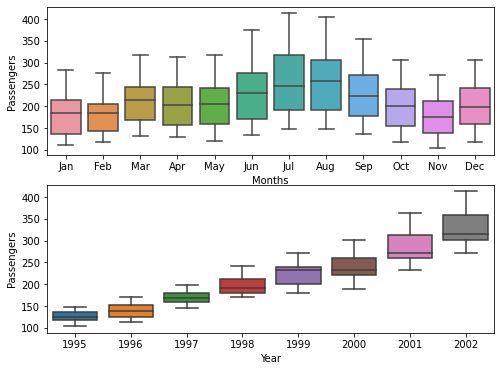

In [10]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='Months',y='Passengers',data=airline)
plt.subplot(212)
sns.boxplot(x='Year',y='Passengers', data=airline)

Preparing dummies

In [11]:
Month_Dummies= pd.DataFrame(pd.get_dummies(airline['Months']))
airline1 = pd.concat([airline,Month_Dummies],axis =1)

In [12]:
airline1["t"] = np.arange(1,97)
airline1["t_squared"] = airline1["t"] * airline1["t"]
airline1["Log_Passengers"] = np.log(airline1["Passengers"])

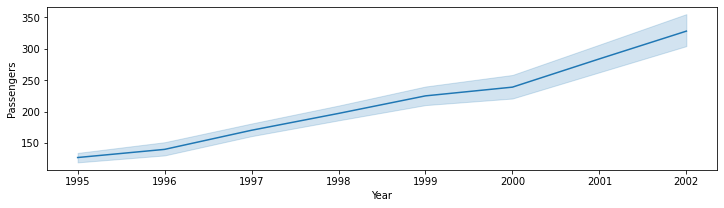

In [13]:
plt.figure(figsize=(12,3))
sns.lineplot(x='Year', y='Passengers', data=airline)

Splitting data

In [14]:
Train = airline1.head(80)
Test = airline1.tail(16)

Linear Model

In [15]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t', data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])- np.array(pred_linear))**2))
rmse_linear

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


47.542624067726805

Exponential Model

In [16]:
Exp = smf.ols('Log_Passengers~t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])- np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334308

Quadratic Model

In [17]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[['t','t_squared']]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584248

Additive seasonality

In [18]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])- np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443316

Additive Seasonality quadratic

In [19]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.91098357010691

Multiplicative Seasonality

In [20]:
Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621107

Multiplicative Additive Seasonality

In [21]:
Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.469000230303982

Tabulating the rmse values

In [22]:
data= {'Model':pd.Series(['rmse_linear','rmse_Exp','rmse_Quad','rmse_add_sea','rmse_add_sea_quad','rmse_Mult_sea','rmse_Mult_add_sea']),'RMSE_Values':pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,Model,RMSE_Values
6,rmse_Mult_add_sea,9.469000
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
1,rmse_Exp,43.793739
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
5,rmse_Mult_sea,135.326484


Conclusion:- From the above rmse values (rmse_Mult_ADD_sea - 9.469 ) is the best fit model

In [23]:
# Forecasting using Multiplicative Additive Seasonality Model
# Forecasting for next 12 months

In [24]:
data = [['2003-01-01','Jan'],['2003-02-01','Feb'],['2003-03-01','Mar'],['2003-04-01','Apr'],['2003-05-01','May'],['2003-06-01','Jun'],['2003-07-01','Jul'],['2003-08-01','Aug'],['2003-09-01','Sep'],['2003-10-01','Oct'],['2003-11-01','Nov'],['2003-12-01','Dec']]
# Print(data)
forecast = pd.DataFrame(data,columns = ['Date','Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-05-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [25]:
# Create dummies and T and T-Squared columns

dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast, dummies], axis =1)
print('After dummy\n',forecast1.head())

forecast1['t'] = np.arange(1,13)
forecast1['t_squared'] = forecast1['t'] * forecast1['t']
print('\nAfter T and T-Squared\n', forecast1.head())

After dummy
          Date Months  Apr  Aug  Dec  Feb  ...  Jun  Mar  May  Nov  Oct  Sep
0  2003-01-01    Jan    0    0    0    0  ...    0    0    0    0    0    0
1  2003-02-01    Feb    0    0    0    1  ...    0    0    0    0    0    0
2  2003-03-01    Mar    0    0    0    0  ...    0    1    0    0    0    0
3  2003-04-01    Apr    1    0    0    0  ...    0    0    0    0    0    0
4  2003-05-01    May    0    0    0    0  ...    0    0    1    0    0    0

[5 rows x 14 columns]

After T and T-Squared
          Date Months  Apr  Aug  Dec  Feb  ...  May  Nov  Oct  Sep  t  t_squared
0  2003-01-01    Jan    0    0    0    0  ...    0    0    0    0  1          1
1  2003-02-01    Feb    0    0    0    1  ...    0    0    0    0  2          4
2  2003-03-01    Mar    0    0    0    0  ...    0    0    0    0  3          9
3  2003-04-01    Apr    1    0    0    0  ...    0    0    0    0  4         16
4  2003-05-01    May    0    0    0    0  ...    1    0    0    0  5         25

[5 

In [26]:
# Forecasting using Multiplicative Additive Seasonality Model

model_full = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =airline1).fit()
pred_new  = pd.Series(model_full.predict(forecast1))
pred_new

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])


In [27]:
# Final Prediction 

Final_predict = forecast1.loc[:, ['Months','Forecasted_Passengers']]
Final_predict

,Months,Forecasted_Passengers
0,Jan,109.176148
1,Feb,110.331245
2,Mar,127.315234
3,Apr,123.200587
4,May,122.399578
5,Jun,138.536397
6,Jul,154.066959
7,Aug,153.741209
8,Sep,137.693733
9,Oct,120.894736


# **CocaCola_Sales_Rawdata**

In [28]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [30]:
# Import dataset
coke =pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')
coke.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [31]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [32]:
coke.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


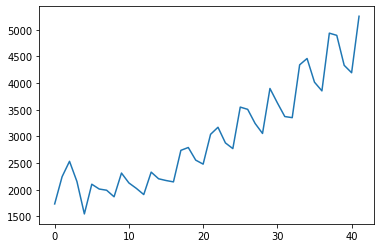

In [33]:
coke.Sales.plot()

In [34]:
coke['Quarters'] = 0
coke['Year'] = 0
for i in range(42):
    p = coke['Quarter'][i]
    coke['Quarters'][i] = p[0:2]
    coke['Year'][i] = p[3:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
# Preparing dummies

Quarters_Dummies =pd.DataFrame(pd.get_dummies(coke['Quarters']))
coke1 = pd.concat([coke,Quarters_Dummies], axis = 1)

In [36]:
coke1["t"]=np.arange(1,43)

coke1["t_squared"] = coke1["t"]*coke1["t"]


coke1["Log_Sales"]=np.log(coke1["Sales"])

In [37]:
coke1.columns

Index(['Quarter', 'Sales', 'Quarters', 'Year', 'Q1', 'Q2', 'Q3', 'Q4', 't',
       't_squared', 'Log_Sales'],
      dtype='object')

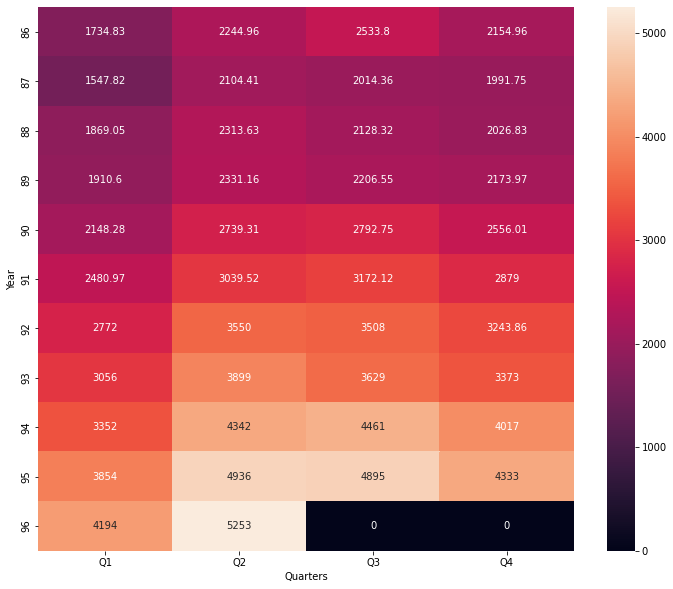

In [38]:
# Visualize the data

plt.figure(figsize=(12,10))
plot_month_y = pd.pivot_table(data = coke, values='Sales',index='Year', columns='Quarters', aggfunc='mean',fill_value=0)
sns.heatmap(plot_month_y, annot= True, fmt = 'g')

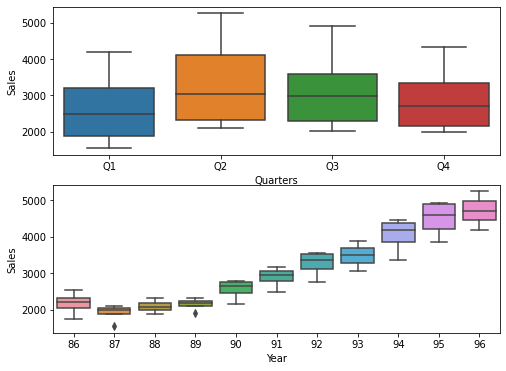

In [39]:
# Boxplot
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=coke1)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=coke1)

Split data in Train and Test

In [40]:
Train = coke1.head(38)
Test = coke1.tail(4)

Linear Model
import statsmodels

In [41]:
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

591.553295722396

Exponential

In [42]:
Exp = smf.ols('Log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

466.2479731067161

Quadratic

In [43]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[['t','t_squared']]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

475.5618351831482

Additive seasonality

In [44]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea =pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154547278

Additive Seasonality Quadratic

In [45]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad =np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

301.73800719351857

Multiplicative Seasonality

In [46]:
Mul_sea = smf.ols('Log_Sales~Q1+Q2+Q3', data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1963.3896400779727

Multiplicative Additive Seasonality

In [47]:
Mul_Add_sea = smf.ols('Log_Sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

225.52439049816806

Tabulating the rmse values

In [48]:
data = {'MODEL':pd.Series(['rmse_linear','rmse_Exp','rmse_Quad','rmse_add_sea','rmse_add_sea_quad','rmse_Mult_sea','rmse_Mult_add_sea']),'RMSE_Values':pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,225.524390
4,rmse_add_sea_quad,301.738007
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
0,rmse_linear,591.553296
3,rmse_add_sea,1860.023815
5,rmse_Mult_sea,1963.389640


Conclustion:- From the above rmse values (rmse_Mult_add_sea 225.524390) is the best fit model

Forecast for next 4 Quarters

In [49]:
data = [['Q3_96','Q3'],['Q4_96','Q4'],['Q1_97','Q1'],['Q2_97','Q2']]
print(data)
forecast = pd.DataFrame(data, columns = ['Quarter','quarter'])
forecast

[['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'], ['Q2_97', 'Q2']]


,Quarter,quarter
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2


In [50]:
# Create dummies and T and T-Squared columnns

dummies  = pd.DataFrame(pd.get_dummies(forecast['quarter']))
forecast1 = pd.concat([forecast, dummies], axis =1)
print('After dummy\n', forecast1.head())

forecast1['t'] = np.arange(1,5)
forecast1['t_squared'] = forecast1['t']* forecast1['t']
print('\nAfter T and T-Squared\n', forecast1.head())

After dummy
   Quarter quarter  Q1  Q2  Q3  Q4
0   Q3_96      Q3   0   0   1   0
1   Q4_96      Q4   0   0   0   1
2   Q1_97      Q1   1   0   0   0
3   Q2_97      Q2   0   1   0   0

After T and T-Squared
   Quarter quarter  Q1  Q2  Q3  Q4  t  t_squared
0   Q3_96      Q3   0   0   1   0  1          1
1   Q4_96      Q4   0   0   0   1  2          4
2   Q1_97      Q1   1   0   0   0  3          9
3   Q2_97      Q2   0   1   0   0  4         16


In [51]:
# Forecasting using Additive Seasonality Quadratic Model

model_full = smf.ols('Sales~ t+t_squared+Q1+Q2+Q3+Q4', data=coke1).fit()
pred_new = pd.Series(model_full.predict(forecast1))
pred_new

forecast1['forecasted_sales'] = pd.Series(pred_new)

In [52]:
# Final sales prediction 

Final_predict = forecast1.loc[:, ['Quarter','forecasted_sales']]
Final_predict

,Quarter,forecasted_sales
0,Q3_96,2180.858824
1,Q4_96,1851.383709
2,Q1_97,1635.419724
3,Q2_97,2284.261547
